In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [25]:
df = pd.read_csv('co2.csv')

In [41]:
df.head(10)

,co2
fecha,
1958-01-01,316.16
1958-01-02,316.16
1958-01-03,316.16
1958-01-04,316.16
1958-01-05,316.16
1958-01-06,316.16
1958-01-07,316.16
1958-01-08,316.16
1958-01-09,316.16


In [27]:
df.rename(columns={'Yr': 'year', 'Mn': 'month', 'Dy': 'day'}, inplace=True)
df['fecha'] = pd.to_datetime(df[['year', 'month', 'day']])
df = df.set_index('fecha', drop=True)

In [28]:
df = df.drop(columns=['NB', 'scale', 'sta', 'year', 'month', 'day'])
df.columns = df.columns.str.lower()

In [29]:
# Para garantizar la consistencia y la compatibilidad entre Pandas y NumPy transformamos los valores 'None' en 'NaN'
df['co2'] = df['co2'].replace('NaN', np.nan)

# Pasar las columnas 'float_columns' al tipo 'float'
df['co2'] = df['co2'].astype(float)

In [30]:
df.head()

,co2
fecha,
1958-01-01,NaN
1958-01-02,NaN
1958-01-03,NaN
1958-01-04,NaN
1958-01-05,NaN


In [31]:
df.isnull().sum()

co2    6297
dtype: int64

In [32]:
# df.loc[(df['fecha']>'2005-10-01') & (df['fecha']<'2005-11-15')]

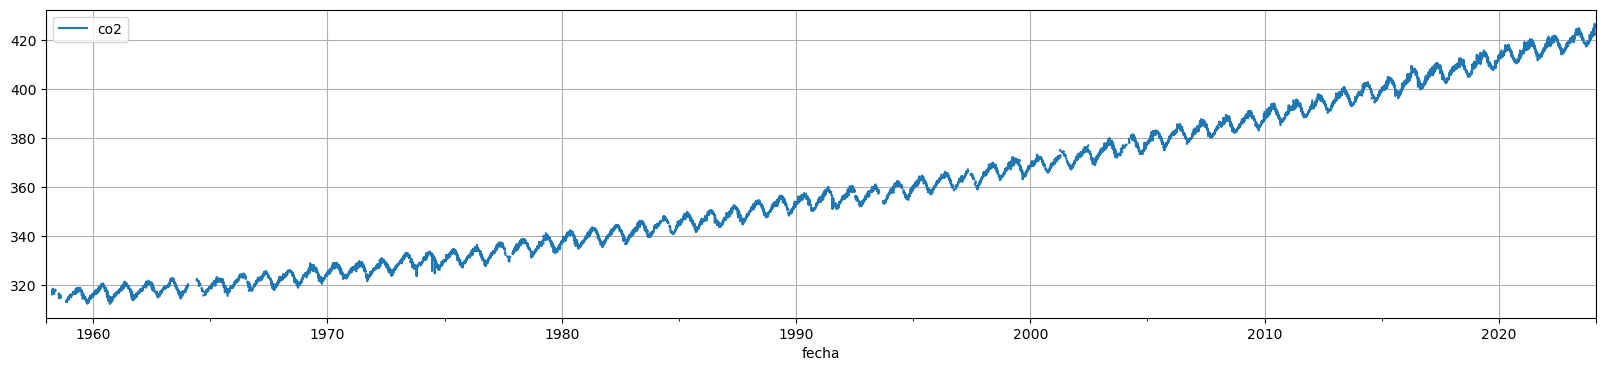

In [33]:
df.plot(figsize=(20, 4))
plt.grid()

In [34]:
df.sample(10)

,co2
fecha,
2006-10-16,379.04
1989-04-11,355.33
1958-07-12,NaN
1975-04-20,333.24
1985-06-15,NaN
1959-04-01,316.50
1994-05-10,NaN
1964-09-01,317.92
1990-07-11,355.24


Rellenaremos los datos con los valores inmediatamente posterior

In [35]:
df = df.bfill()

In [36]:
df.isnull().sum()

co2    21
dtype: int64

Guardamos esta libreta en formato csv para su tratamiento como fichero en otras libretas

In [37]:
alicante_co2 = df.loc[(df.index >= '1964-01-02') & (df.index <= '2023-12-31')]

In [38]:
alicante_co2.to_csv('alicante_co2.csv')

In [39]:
valencia_co2 = df.loc[(df.index >= '1948-01-01') & (df.index <= '2023-12-31')]

In [40]:
valencia_co2.to_csv('valencia_co2.csv')